# TP 1 : Reminder on Markov Chains – Stochastic gradient descent


### Exercise 1 : Box-Muller and Marsaglia-Bray algorithm

**Let R a random variable with Rayleigh distribution with parameter 1 and $\Theta$ with uniform distribution on $[0, 2\pi]$. We also assume that R and $\Theta$ are independent.**

**$$ \forall r \in \mathbb{R} \ \ \ f_R(r)=rexp(-\frac{r^2}{2}) \mathbb{1}_{\mathbb{R}^+}(r)$$**

**1. Let X and Y such that $ X = R cos (\theta)$ and $Y = R sin(\theta)$. Prove that both X and Y have $\mathcal{N}(0, 1)$ distribution and are independent.**
   
   Let h be a continuous and bounded function.
   
   $\begin{align*}
   \mathbb{E}[h(X,Y)] &=    \mathbb{E}[h(R,\theta)]  \\
   &= \int_0^{2\pi} \int_{\mathbb{R}⁺} h(R, \theta) \frac{r}{2\pi} e^{-\frac{r^2}{2}} dr d\theta \\
   &= \iint_{\mathbb{R}} h(R, \theta) \frac{1}{2\pi} e^{-\frac{x^2 + y^2}{2}} dx dy\\
   \end{align*}
   $ 
   
   The joint density is the product of densities, therefore $(X,Y) \sim \mathcal{N}(0,1)$ and X and Y are independant. 
   
   
**2. Write an algorithm for sampling independent Gaussian distribution $\mathcal{N}(0, 1)$** 

   We can easily sample $\theta \sim \mathcal{U}(0,2\pi)$. 

   $\begin{align*}
   F_r(r) &= \int_{-\infty}^{r} f_r(r) dr \\
   &= \int_0^r re^{-\frac{r^2}{2}} dr \\
   &= [e^{-\frac{r^2}{2}}]_0^r \\
   &= 1 - e^{-\frac{r^2}{2}} \\
   \end{align*}
   $ 
   
   Since $F_r(r) \in [0,1]$, let $Z \sim \mathcal{U}(0,2\pi)$. Z is also easy to compute. 
   
   $
   Z = F_r(r) \iff 1-Z = e^{-\frac{r^2}{2}}
   \iff 2 log(1-Z) = -r^2
   \iff \sqrt{-2log(1-Z)} = r
   $
   
   Since $ F_r^{-1}(\mathcal{U}) \sim \mathcal{R}(1)$, we can sample R using Z. 
   Then $ X = R cos(\theta) \sim \mathcal{N}(0,1)$ can be easily computed. 
   


Text(0.5, 1.0, 'Y')

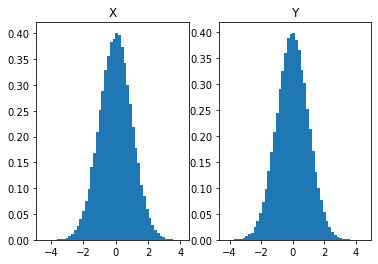

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Gaussian(size=100):
    z = np.random.uniform(0,1,size=size)
    theta = np.random.uniform(0,2 * np.pi,size=size)
    R = np.sqrt(-2 * np.log(1-z))
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    return x,y

x,y = Gaussian(100000)
ax1 = plt.subplot(121)
ax1.hist(x,bins=50,density=True)
ax1.set_title('X')
ax2 = plt.subplot(122)
ax2.hist(y,bins=50,density=True)
ax2.set_title('Y')


**3. a) What is the distribution of $(V_1, V_2)$ at the end of the repeat/until loop ?** 

   $(V_1, V_2) \sim \mathcal(U)(B_1)$ with $B_1$ the unit sphere centered in (0,0) and of radius 1. 
   
   

   **b) Set $$T_1 = \frac{V_1}{V_1^2+V_2^2}, \ \ \ T_2 = \frac{V_2}{V_1^2+V_2^2}, \ \ \ R=V_1^2+V_2^2$$**

   **Show that $T_1,T_2$ and R are independent, $R\sim \mathcal{U}([0, 1])$ and $(T_1, T_2)$ has the same distribution as $(cos(\theta),sin(\theta)$ with $\theta \sim \mathcal{U}([0, 2\pi])$.** 
   
   The unit sphere's area is equal to $\pi$.
   
   By using the variable change $ V_1 = \sqrt{u} cos(\theta)$, $ V_2 = \sqrt{u} sin(\theta)$ and $u = V_1^2 + V_2^2$, the Jacobian $|\frac{\partial (V_1,V_2)}{\partial u \partial \theta}|=\frac{1}{2}$. 
   
   Then we have :
   
   $\begin{align*}
   \mathbb{E}[h(T_1, T_2, V)]  &=  \iint_{B_1} \frac{1}{\pi} h(\frac{V_1}{\sqrt{V_1^2 + V_2^2}}, \frac{V_2}{\sqrt{V_1^2 + V_2^2}},V_1^2 + V_2^2) dV_1 dV_2 \\
   &= \iint_{[0,2\pi]x[0,1]} \frac{1}{2\pi} h( cos(\theta), sin(\theta), u) du d\theta \\
   \end{align*}
   $
   
   Therefore $T_1$, $T_2$ and $V$ are independant, $V \sim  \mathcal{U}([0,1])$ and $(T_1, T_2) \sim (cos(\theta), sin(\theta))$ with $ \theta \sim \mathcal{U}([0,1\pi])$.
   
   
   
   **c) What is the distribution of the output (X,Y) ?** 
   
   $V \sim \mathcal{U}([0,1])$
   
   Let's find the distribution of S. 
      
   $\begin{align*}
   F(r) &= \mathbb{P}(s < r)\\
   &= \mathbb{P}(- 2 log(V_1^2 + V_2^2) < r^2)\\
   &= \mathbb{P}(V_1^2 + v_2^2 > e^{-\frac{r^2}{2}})\\
   &= 1 - e^{-\frac{r^2}{2}}\\
   \end{align*}
   $
   
   Then $f_s(r) = \frac{\partial F(r)}{\partial r} = re^{- \frac{r^2}{2}}$, S follows a Rayleigh distribution with parameter 1. $X = ST_1$ and $Y=ST_2$ are generated under the same conditions as in question 1, therefore $(X,Y) \sim \mathcal{N}(0,1)$.
   
   
   
   **d) What is the expected number of steps in the "while" loop ?** 
   
   At each step inside the while loop, the loop ends if $V_1^2 + V_2^2 <1$. The probability to get out of the loop is equal to $p=\frac{\pi}{4}=\frac{\textit{area of $B_1$}}{\textit{area of the cube 2x2}}$.
   
   Let Z be the number of step done in the while loop. Z follows a geometric distribution with parameter p.
   Then the expected number of step in the while loop is equal to $\frac{1}{p} = \frac{4}{\pi}$.

In [2]:
def MarsagliaBray():
    u = np.random.uniform(0,1,2)
    v = 2 * u - 1
    nb_step = 1
    while v.dot(v) > 1:
        u = np.random.uniform(0,1,2)
        v = 2 * u - 1
        nb_step += 1
    s = np.sqrt(- 2 * np.log(v.dot(v)))
    x = (s * v)/np.sqrt(v.dot(v))
    return(x, nb_step)

size = 100
sum = 0
for i in range(size):
    _, nb_step = MarsagliaBray()
    sum += nb_step
print("Mean number of step in the while loop with "+str(size)+" iterations = " +str(sum/size))

Mean number of step in the while loop with 100 iterations = 1.25


## Exercise 2 : Invariant Distribution 

**We define a Markov chain $(Xn)_{n \leq 0}$ with values in $[0, 1]$ as follows : given the current value $X_n (n \in N)$ of the chain,**

**If $X_n =\frac{1}{m}$ (for some positive integer m), we let :
**$$ \begin{cases} X_{n+1}=\frac{1}{m+1} \ \ \ \text{with probability} \ \ \ 1-X_n^2 \\ X_{n+1} \sim \mathcal{U}(0,1) \ \ \ \text{with probability} \ \ \ X_n^2 \end{cases} $$**

**If not, $X_{n+1} \sim \mathcal{U}(0,1)$**

**1. Prove that the transition kernel of the chain $(X_n)_{n\geq0}$ is given by :**
**$$ P(x,a)= \begin{cases} x^2 \int_{A \cap [0,1]}dt +(1-x^2) \delta_{\frac{1}{m+1}}(A) \ \ \ if \ \ x=\frac{1}{m} \\ \int_{A \cap [0,1]}dt \ \ \ \text{otherwise} \end{cases} $$**
**where $\delta_{\alpha}$ is the Dirac measure at $\alpha$.**

$A \in B([0,1])$. Let $B_i \sim \mathcal{B}(1-X_i^2)$.
If $X_0=\frac{1}{m}$:

$\begin{align*}
P(X_0,A) &= \mathbb{P}(X_1 \in A | X_0 = \frac{1}{m})\\
&= \mathbb{E}[\mathbb{1}_{x \in A}(X_1)|X_0=\frac{1}{m}]\\
&= \mathbb{P}(B_0=1|X_0=\frac{1}{m})\mathbb{E}[\mathbb{1}_{x \in A}(X_1)|B_0=1,X_0=\frac{1}{m}]+\mathbb{P}(B_0=0|X_0=\frac{1}{m})\mathbb{E}[\mathbb{1}_{x \in A}(X_1)|B_0=0,X_0=\frac{1}{m}]\\
&= (1-X_0^2)\mathbb{1}_{x \in A}(\frac{1}{m+1})+X_0^2\int_{0}^{1} \mathbb{1}_{x \in A}(x) dx\\
&= (1-X_0^2) \delta_{\frac{1}{m+1}}(A) + X_0^2 \int_{A \cap [0,1]}dt\\
\end{align*}
$


If $X_0\neq\frac{1}{m}$:

$\begin{align*}
P(X_0,A) &= \mathbb{P}(X_1 \in A | X_0 \neq \frac{1}{m})\\
&= \mathbb{E}[\mathbb{1}_{x \in A}(X_1)|X_0 \neq \frac{1}{m}]\\
&=\int_{0}^{1} \mathbb{1}_{x \in A}(x) dx\\
&= \int_{A \cap [0,1]}dt
\end{align*}
$

We have the transition kernel we wanted. 


**2. Prove that the uniform distribution on $[0, 1]$ is invariant for P. In the following, this invariant distribution will be denoted by $\pi$.**

We suppose that $ X_0 \sim \pi$. h is a continuous and bounded function. 

$\begin{align*}
\forall m\in \mathbb{N},\\
P\pi(B) &= \int_{[0,1]} P(x,B) \pi(x) dx\\
&= \int_{[0,1]\setminus \frac{1}{m}} P(x,B) \pi(x) dx\\
&= \int_{[0,1]\setminus \frac{1}{m}} \int_{B \cap [0,1]}dt \pi(x) dx\\
&= \int_{B \cap [0,1]}dt\\
&= \pi(B)
\end{align*}
$

**3. Let $x \notin {\frac{1}{m}, m \in N^*}$.Compute $Pf(x)$ for a bounded measurable function $f$. Deduce $P^n f(x)$ for all $n \geq 1$. Compute $lim_{n\to+\infty} P^n f(x)$ in terms of $\int f(x) \pi(x)dx$.**

For n = 1:

$\begin{align*}
Pf(x)&=\int_{[0,1]}P(x,y)f(y)dy\\
&=\int_{[0,1]}f(y)\int_{[0,1] \cap dy}dtdy\\
&=\int_{[0,1]}f(y)dy\\
&=\int_{\mathbb{R}}\pi(y)f(y)dy
\end{align*}
$

Using recursion, we suppose that $\exists n \in \mathbb{N}$ such that :
$P^n(f(x))=\int_{\mathbb{R}} f(y) \pi(y) dy$

$$\begin{aligned} 
P^{n+1}(f(x)) &= P(P^{n}(f(x))) \\ 
&= \int_{\mathbb{R}} P(x,dy) P^{n}(f(y)) \\ 
&= \int_{0}^{1} P^{n}(f(y)) dy \\ 
&= \int_{0}^{1} \int_{\mathbb{R}} f(x) \pi(x) dx dy \\ 
&=\int_{\mathbb{R}} f(x) \pi(x) dx 
\end{aligned}$$

Therefore, $lim_{n\to+\infty} P^n f(x) = \int_{\mathbb{R}} f(x) \pi(x)dx$.


**4. Let $x=\frac{1}{m}$ with $m \geq 2$**

**a) Let $n \in N^*$. Compute $P^n(x,\frac{1}{n+m})$ in terms of m and n.**

$$\begin{align*}
P^n(x,\frac{1}{n+m})&=P^n(\frac{1}{m},\frac{1}{n+m})\\
&=\prod_{i=0}^{n-1}P(\frac{1}{m+i},\frac{1}{m+i+1})\\
&=\prod_{i=0}^{n-1}(1-(\frac{1}{m+i})^2)\\
&=\prod_{i=m}^{m+n-1}(1-(\frac{1}{i})^2)\\
&=\prod_{i=m}^{m+n-1}\frac{i^2-1}{i^2}\\
&=\prod_{i=m}^{m+n-1}\frac{(i-1)(i+1)}{i^2}\\
&=\frac{(m-1)(m+n)}{m(m+n-1)}\\
&=\frac{m^2-m+nm-n}{m(m+n-1)}\\
&=\frac{m(m+n-1)-n}{m(m+n-1)}\\
&= 1-\frac{n}{m(m+n-1)}\\
\end{align*}$$ 


**b) Do we have $lim_{n\to+ \infty} P^n(x,A)=\pi(A)$ when $A=\bigcup\limits_{q \in N} {\frac{1}{m+1+q}}$ ?**

We have $\pi(A)=0$.

$$\begin{align*}
P^n(x,A)&=P^n(\frac{1}{m},A)\\
&=\sum_{q \in \mathbb{N}} P^n(\frac{1}{m},\frac{1}{m+q+1})\\
&=P^n(\frac{1}{m},\frac{1}{m+n})\\
&= 1-\frac{n}{m(m+n-1)}\\
&\geq 1-\frac{n}{2(n+1)}
\end{align*}$$ 

Indeed $m\geq2$, so $\frac{n}{m(m+n+1)}\leq \frac{n}{2(n+1)}$. 

Then $lim_{n \to +\infty}  1-\frac{n}{2(n+1)}=1/2>\pi(A)=0$.


## Excercise 3 Stochastic Gradient Descent

**In the exercise, we consider the problem of classifying patterns x into two classes $y = ±1$. We assume that there is a relationship between a pattern and its class, embodied by some probability distribution $P(x, y)$. If we know this distribution, we know the conditional probabilities $P(y|x)$ as well, and we can solve immediately the problem using the Bayes decision rule. Learning means “Acquiring enough knowledge about $P(x, y)$ from the examples to solve the classification problem”.**

**The statistical machine learning approach begins with the collection of a sizeable set of examples $\{(x_1, y_1), . . . , (x_n, _yn)\}$, where for each $i \in [1,n]$ the vector $x_i$ represents the features and the scalar $y_i$ a label indicating whether $x_i$ belongs $(y_i = 1)$ or not $(y_i = −1)$ to a particular class. With such a set of examples, one can construct a classification program, defined by a prediction function h, and measure its performance by counting how often the program prediction $h(x_i)$ differs from the correct prediction $y_i$. To avoid rote memorization, one should aim to find a prediction function that generalizes the concepts that may be learned from the examples. One way to achieve good generalized performance is to choose amongst a carefully selected class of prediction functions.**

**Thanks to such a high-dimensional sparse representation of documents, it has been deemed empirically sufficient to consider prediction functions of the form $h(x;w,\tau) = w^tx − \tau$ . Here, $w^tx$ is a linear discriminant parameterized by $w \in \mathbb{R}^d$ and $\tau \in \mathbb{R}$ is a bias that provides a way to compromise between precision and recall, $P[y = 1|h(x) = 1]$ and $P[h(x) = 1|y = 1]$ respectively. The accuracy of the predictions could be determined by counting the number of times that $sign(h(x;w, \tau ))$ matches the correct label, i.e., 1 or -1. However, while such a prediction function may be appropriate for classifying new features, formulating an optimization problem around it to choose the parameters $(w; \tau)$ is impractical in large-scale settings due to the combinatorial structure introduced by the sign function, which is discontinuous. Instead, one typically employs a continuous approximation through a loss function that measures a cost for predicting h when the true label is y.**

**An Adaline (Widrow and Hoff, 1960) actually learns by (i) considering linear prediction function, $h(x,w) = w^tx$, and (ii) measuring the quality of the system through the mean squared error : $$CAdaline(w) =\int (y − h(x,w))^2 dP(x, y) =\int (y − w^tx)^2 dP(x, y)$$**

**Learning consists of finding the parameter w that minimizes the above, or a more general, cost. This framework is the basis of classical statistical inference theory. Hundreds of practical algorithms have been derived.**

**In the following, we will denote by $z = (x, y)$ the observation and consider the cost or expected risk given a parameter vector w with respect to the probability P. $$R(w) = E[J(w, z)] =\int (y − w^tx)^2 dP(z)$$ While it may be desirable to minimize the expected loss that would be incurred from any inputoutput pair, such a goal is untenable when one does not have complete information about P. Thus, in practice, one seeks the solution of a problem that involves an estimate of the expected risk $\mathbb{R}$. In supervised learning, one has access (either all-at-once or incrementally) to a set of $n \in N$ independently drawn input-output samples $\{z_i = (x_i, y_i)\}_{i=1}^n$ and one may define the empirical risk function $R_n : \mathbb{R}^d \to \mathbb{R}$ by:**
**$$R_n(w) = \frac{1}{n} \sum_{i=1}^n (y_i − w^tx_i)^2$$**


**1. Describe the stochastic gradient descent algorithm for minimizing the empirical risk and implement it in matlab or python.**


The aim of the stochastic gradient descent is to minimize the empirical risk $R_n(w,z)$. With $z = (x, y)$, $J(w,z) = (y − w^tx)^2$ and $R_n(w) = \frac{1}{n} \sum_{i=1}^n J(w, z_i)$.
The steps of the algorithm are the following : 
____

Initialise $W_0$ with random numbers.

For each iteration k:

   - Sample $z_{k+1}$ in ${z_i = (x_i, y_i)}_{i=1}^n$ 
    
   - Compute $\bigtriangledown_W J(W_k, z_{k+1})=\frac{\partial J(W_k, z_{k+1})}{\partial W_k}$
    
   - Update $W_{k+1} = W_k - \alpha \bigtriangledown_W J(W_k, z_{k+1})$ with $\alpha$ the learning rate

___

Repeat until convergence. A good stop criteria is to check if $||W_{k+1}-W_k||$ is smaller than a defined threshold on a window. 

In [36]:
def stochastic_grad_descent(x,y,alpha=1,size_window=10,threshold=10e-4):
    #initialisation 
    w = np.array(np.ones(x.shape[1]))
    w = w / np.sqrt(w.dot(w))
    window = [False] * size_window
    nb_iteration = 1
    while False in window:
        j = np.random.randint(len(y)) - 1 #Sample
        w_update = w + alpha * (1/nb_iteration) * 2* (y[j]- x[j,:].dot(w)) * x[j,:]  #Compute and Update 
        window.append(np.linalg.norm(w_update - w)<threshold) #Comparison with threshold
        window.pop(0) #Update the window
        w = w_update
        nb_iteration +=1
    print("Stochastic gradient is over after " + str(nb_iteration-1)+ " iterations.")
    return(w)

**2. Sample a set of observations $\{z_i\}_{i=1}^n$ by generating a collection of random points $x_i$ of $\mathbb{R}^2$, $w \in \mathbb{R}^2$ seen as the normal vector of an hyperplane, a straight line here, and assigning the label $y_i$ according to the side of the hyperplane the point $x_i$ is.**


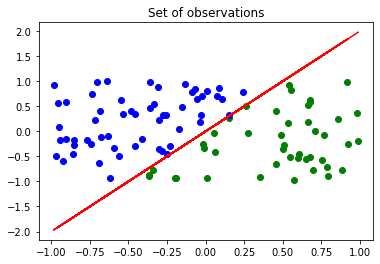

In [4]:
n = 100
x = np.reshape(np.array(np.random.uniform(-1,1,2*n)),(n,2))

w = np.array([-1,0.5])
w = w / np.sqrt(w.dot(w))

y = x @ w
y[y>0] = 1
y[y<0] = -1

plt.figure()
for i in range(n):
    if y[i]==1:
        plt.scatter(x[i,0],x[i,1],color='b')
    else:
        plt.scatter(x[i,0],x[i,1],color='g')
        
plt.plot(x[:,0],-x[:,0]*w[0]/w[1], color='r')
plt.title("Set of observations")
plt.show()

**3. Test the algorithm you wrote at the first question over these observations. What is the vector $w^*$ estimated ? Is it far from w ?**


In [5]:
w_estimated = stochastic_grad_descent(x,y)
w_estimated = w_estimated / np.sqrt(w_estimated.dot(w_estimated))
diff = np.linalg.norm(w_estimated - w)
print("The original vector = ", w)
print("Vector estimated = ", w_estimated)
print("The error = ", diff)

Stochastic gradient is over after 639 iterations.
The original vector =  [-0.89442719  0.4472136 ]
Vector estimated =  [-0.93854     0.34517051]
The error =  0.11116983290256477


We can plot in red the points badly classified with our estimator.

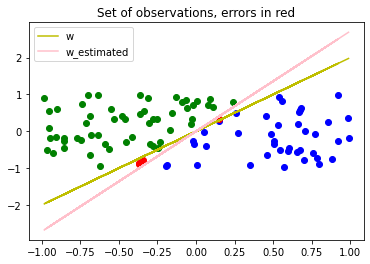

In [6]:
plt.figure()
for i in range(n):
    if (x @ w)[i]*(x @ w_estimated)[i] < 0:
        plt.scatter(x[i,0],x[i,1],color='r')
    elif y[i]==1:
        plt.scatter(x[i,0],x[i,1],color='g')
    else:
        plt.scatter(x[i,0],x[i,1],color='b')
        
plt.plot(x[:,0],-x[:,0]*w[0]/w[1], color='y', label='w')
plt.plot(x[:,0],-x[:,0]*w_estimated [0]/w_estimated [1], color='pink', label = 'w_estimated')
plt.title("Set of observations, errors in red")
plt.legend()
plt.show()

**4. Noise your observations $\{z_i\}_{i=1}^n$ with an additive Gaussian noise and perform the optimisation again. Compare with the result of question three.**


In [7]:
noise = np.reshape(np.array(np.random.normal(0,1,2*n)), (n,2))
x_noisy = x + noise

w_estimated = stochastic_grad_descent(x_noisy, y)
w_estimated = w_estimated / np.sqrt(w_estimated.dot(w_estimated))
diff = np.linalg.norm(w_estimated - w)
print("The original vector = ", w)
print("Vector estimated = ", w_estimated)
print("The error = ", diff)

Stochastic gradient is over after 2118 iterations.
The original vector =  [-0.89442719  0.4472136 ]
Vector estimated =  [-0.98026542  0.1976859 ]
The error =  0.2638792750749198


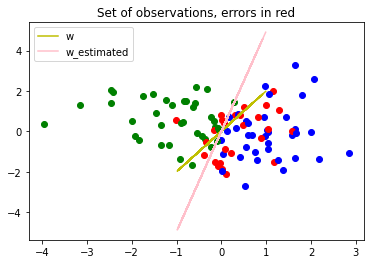

In [8]:
plt.figure()
for i in range(n):
    if (x@ w)[i]*(x_noisy @ w_estimated)[i] < 0:
        plt.scatter(x_noisy[i,0],x_noisy[i,1],color='r')
    elif y[i]==1:
        plt.scatter(x_noisy[i,0],x_noisy[i,1],color='g')
    else:
        plt.scatter(x_noisy[i,0],x_noisy[i,1],color='b')
        
plt.plot(x[:,0],-x[:,0]*w[0]/w[1], color='y', label='w')
plt.plot(x[:,0],-x[:,0]*w_estimated [0]/w_estimated [1], color='pink', label = 'w_estimated')
plt.title("Set of observations, errors in red")
plt.legend()
plt.show()

The performance of the algorithm decreases sharply if the data are noisy. The distance between the estimated vector and the genuine vector is larger, convergence slower. Naturally, more points are misclassified.

**5. Test the algorithm on the Breast Cancer Wisconsin (Diagnostic) Data Set: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 .**


In [29]:
import pandas as pd
import sklearn 
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split

# Get the file
data = pd.read_csv('breast-cancer-wisconsin.data',na_values='?')
data.columns = ["id"]+list(["x%d" %i for i in range(1,10)])+list("y")
data.index = data.iloc[:,0]
data = data.iloc[:,1:]
data.dropna(inplace=True)

# Get data X, Y
x_cancer = data[["x%d" %i for i in range(1,10)]]
y_cancer = np.where(data["y"]==2,-1,1)

#Split Train, Test
x_cancer_train, x_cancer_test, y_cancer_train, y_cancer_test = train_test_split(x_cancer,y_cancer,random_state=5)

#Normalize
scaler = Normalizer().fit(x_cancer_train)
x_cancer_train_norm = scaler.transform(x_cancer_train)
x_cancer_test_norm = scaler.transform(x_cancer_test)

In [43]:
#Estimate W
w_estimated = stochastic_grad_descent(x_cancer_train_norm, y_cancer_train,size_window=15,threshold=10e-5)
w_estimated = w_estimated / np.sqrt(w_estimated.dot(w_estimated))

#Confusion matrix
y_pred = np.where(x_cancer_test_norm.dot(w_estimated)>0,1,-1)
confusion_matrix = sklearn.metrics.confusion_matrix(y_cancer_test, y_pred)/len(y_pred)
print("The confusion matrix is", confusion_matrix)
print("The accuracy is equal to ", confusion_matrix[0,0] + confusion_matrix[1,1])

Stochastic gradient is over after 15742 iterations.
The confusion matrix is [[0.63157895 0.03508772]
 [0.09356725 0.23976608]]
The accuracy is equal to  0.871345029239766


The algorithm performs pretty well on the dataset.